In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
#from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from collections import Counter
import sqlite3

In [2]:
# Load the data
file_path = 'books.csv'
df = pd.read_csv(file_path, error_bad_lines = False)
df.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
# create a random column for genre
df['randNumCol'] = np.random.randint(0,5, size=len(df))

In [4]:
# create a random column for gender
df['randNumCol2'] = np.random.randint(0,2, size=len(df))


In [5]:
# create a random column for age
df['randNumCol3'] = np.random.randint(18,80, size=len(df))


In [6]:
df.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,randNumCol,randNumCol2,randNumCol3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,0,1,61
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2,0,52
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,0,0,56
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,3,0,28
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,0,0,32
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,1,1,51
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4,1,69
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books,2,1,25
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,3,0,69
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown,0,1,23


In [7]:
## replace column name with gender
df["randNumCol2"].replace({0: "M", 1: "F"}, inplace=True)


In [8]:
## replace randnumcol with genre

df["randNumCol"].replace({0: "Adventure", 1: "Non-Fiction", 2:"Thriller", 3:"Romance", 4: "Fiction", 5:"Sci-Fi"}, inplace=True)

In [9]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,randNumCol,randNumCol2,randNumCol3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Adventure,F,61
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Thriller,M,52
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Adventure,M,56
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Romance,M,28
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Adventure,M,32


In [10]:
## change column name of random number to genre column
df.rename(columns = {'randNumCol' : 'genre', 'randNumCol2': 'gender', 'randNumCol3': 'age'}, inplace = True)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,gender,age
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Adventure,F,61
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Thriller,M,52
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Adventure,M,56
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Romance,M,28
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Adventure,M,32


In [11]:
## read df to csv file to import into tableau
df.to_csv('books_added_features.csv')

In [12]:
#  1. Get the total books for each genre

genre_count = df.groupby(["genre"]).count()["bookID"]
genre_count

genre
Adventure      2241
Fiction        2270
Non-Fiction    2243
Romance        2144
Thriller       2225
Name: bookID, dtype: int64

In [13]:
# 2. Get avg rating for each genre

genre_total_avg_rating = df.groupby(["genre"]).sum()["average_rating"]
genre_total_avg_rating

genre
Adventure      8815.77
Fiction        8917.04
Non-Fiction    8845.40
Romance        8425.52
Thriller       8754.99
Name: average_rating, dtype: float64

In [14]:
#  1. Get the total books for each gender

gender_count = df.groupby(["gender"]).count()["bookID"]
gender_count

gender
F    5480
M    5643
Name: bookID, dtype: int64

<BarContainer object of 5 artists>

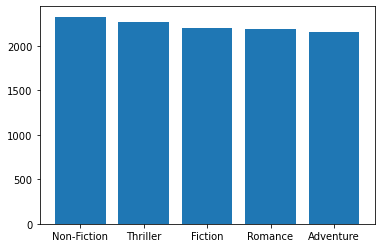

In [15]:
import matplotlib.pyplot as plt

# Set the x-axis to a list of strings for each month.
x_axis = ["Non-Fiction", "Thriller", "Fiction", "Romance", "Adventure"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [2326, 2263, 2196, 2185, 2155]

# Create the plot
plt.bar(x_axis, y_axis)

In [ ]:
# # 6. Create a summary DataFrame with all the data gathered from Steps 1-5
# books_summary_df = pd.DataFrame(
#         {
#         "genre count": genre_count, 
#         "gender count": gender_count, 
#         "genre_total_avg_rating ": genre_total_avg_rating
# })
